In [1]:
from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import LogisticRegression #logistic regression
# from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
# from sklearn.neighbors import KNeighborsClassifier #KNN
# from sklearn.naive_bayes import GaussianNB #Naive bayes
# from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [2]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
# from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV

In [2]:
my_df = pd.read_csv('modified-adult-data.csv')

In [3]:
my_df.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6


In [4]:
drop_elements = ['education-num', 'native-country', 'income']
y = my_df['income']
X = my_df.drop(drop_elements, axis=1)


In [5]:
X.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30


In [6]:
drop_elements = ['workclass', 'marital-status', 'occupation', 'race', 'native-country', 'income']
X = my_df.drop(drop_elements, axis=1)
X.head()

,Unnamed: 0,age,gender,capital-gain,capital-loss,hours-per-week,education-num
0,0,25,Male,0,0,40,7
1,1,38,Male,0,0,50,9
2,2,28,Male,0,0,40,12
3,3,44,Male,7688,0,40,10
4,5,34,Male,0,0,30,6


In [7]:
X['gender_numeric'] = np.where(X['gender'] == 'Male', 1, np.where(X['gender'] == 'Female', 0, X['gender']))
del X['gender']
X.head()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week,education-num,gender_numeric
0,0,25,0,0,40,7,1
1,1,38,0,0,50,9,1
2,2,28,0,0,40,12,1
3,3,44,7688,0,40,10,1
4,5,34,0,0,30,6,1


In [8]:
del X['Unnamed: 0']

In [9]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,gender_numeric
0,25,0,0,40,7,1
1,38,0,0,50,9,1
2,28,0,0,40,12,1
3,44,7688,0,40,10,1
4,34,0,0,30,6,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<IPython.core.display.Javascript object>

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [19]:
# std_scale = preprocessing.StandardScaler().fit(my_df.drop('income', axis=1))
# X = std_scale.transform(my_df.drop('income', axis=1))
# y = my_df['income']

# # Formatting
# target_names = [0,1]
# colors = ['blue','yellow','pink']
# lw = 2
# alpha = 0.3
# # 2 Components PCA
# plt.style.use('seaborn-whitegrid')
# plt.figure(2, figsize=(20, 8))

# plt.subplot(1, 2, 1)
# pca = PCA(n_components=2)
# X_r = pca.fit(X).transform(X)
# for color, i, target_name in zip(colors, [0, 1], target_names):
#     plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
#                 color=color, 
#                 alpha=alpha, 
#                 lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('First two PCA directions');

# # 3 Components PCA
# ax = plt.subplot(1, 2, 2, projection='3d')

# pca = PCA(n_components=3)
# X_reduced = pca.fit(X).transform(X)
# for color, i, target_name in zip(colors, [0, 1], target_names):
#     ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
#                color=color,
#                alpha=alpha,
#                lw=lw, 
#                label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.set_ylabel("2nd eigenvector")
# ax.set_zlabel("3rd eigenvector")

# # rotate the axes
# ax.view_init(30, 10)

In [30]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8210060807075732


In [35]:
from sklearn.naive_bayes import GaussianNB #Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7868435599778884


In [22]:
# from sklearn.linear_model import LogisticRegression #logistic regression

In [37]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8175787728026535


c:\users\udit0\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8211166390270868


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

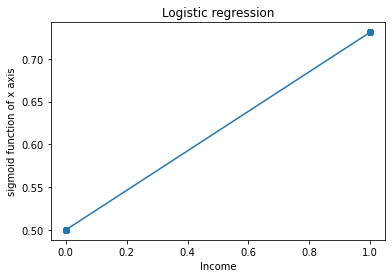

In [41]:
drop_elements = ['education-num', 'native-country']
y = my_df['income']
X = my_df.drop(drop_elements, axis=1)
y=X['income']
z = 1/(1 + np.exp(-y))
plt.scatter(y,z)
plt.xlabel("Income")
plt.ylabel("sigmoid function of x axis")
plt.title("Logistic regression")
plt.plot(y,z)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(33.0, 0.5, 'Actual classes')

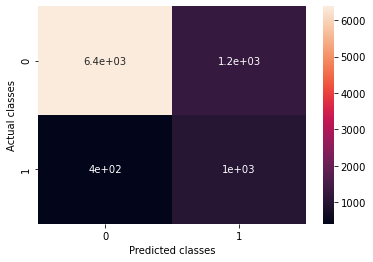

In [38]:
cfm=confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

c:\users\udit0\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\udit0\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

LR: 0.803100 (0.017137)
RF: 0.812700 (0.010120)


c:\users\udit0\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.816100 (0.012103)


c:\users\udit0\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


NB: 0.790600 (0.016681)


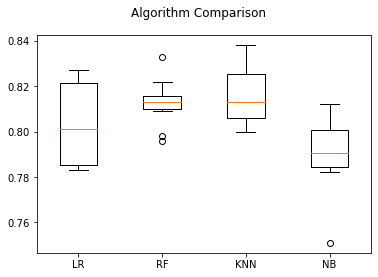

In [22]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier #Random Forest

# load dataset

seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
XX_train = X_train[:10000]
Y_train = y_train[:10000]
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, XX_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()